# How did First Time Buyers’ (FTB) Relief impact housing market of different property types in Greater London Area?

# Project 1

## Introduction

The Great Recession in 2008 demonstrated how changes to the housing market have not only economic but also social consequences. John Bone and Karen O'Reilly (2010) suggest that the recent trend of viewing the purchase of property as an investment rather than a primary place to live contributes to growing housing unaffordability. This socio-economic issue specifically concerns younger people who do not come from a privileged background and do not have substantial savings to enter the housing market. According to Nissa Finney and Albert Sabater (2022), as housing in certain areas of England and Wales becomes less affordable, it causes a generational divide in housing opportunities. Age segregation becomes more prominent, presenting challenges to social mobility. Additionally, John Bone and Karen O'Reilly (2010) mention how a larger number of individuals owning a stable home results in more sustainable communities and benefits the overall wellbeing of many families. According to Nikodem Szumilo (2018), accessible homeownership would not necessarily change wages but might potentially have positive implications for increased economic activity. 

On November 22, 2017, the UK government announced a new policy, the First Time Buyers' (FTB) Relief, which exempted first time buyers from paying a Stamp Duty Land Tax (SDLT) on an acquired house with a value of less than 300 thousand pounds and removed property tax from house purchases valued less than 500 thousand. This policy targeted the lower end of the housing market and should have increased affordability for many young individuals who were trying to get on to the property ladder (Bolster, 2011). Housing is a necessity, as people require a place to live, and demand for most necessities is inelastic. When the government removes tax burden, demand increases, as individuals pay less. Economic theory predicts that any intervention that intends to decrease deadweight loss in the market with inelastic demand should not have a substantial effect on quantity but might largely increase the price, especially in a short run. The long term effect of the policy depends on the elasticity of supply. The supply of housing might increase because the higher prices encourage individuals to sell their property and firms to build more housing units. However, the surge in supply happens to a lesser extent in densely populated areas, where the land for new construction projects is scarce. In the long run, housing prices might fall, depending on the increase in supply. As the UK government's policy targets the lower end of the market, the price and quantity changes should happen within property market for types that are generally less expensive. Therefore, FTB Relief policy type requires clear evaluation. This paper explores the impact of the First Time Buyers’ (FTB) Relief on housing prices of different property types in Greater London Area.

Anna Bolster(2011) conducts analysis of the FTB Releif that was temporary introduced in 2011 but abolished later by HM of Reveue & Customs (p. 27). She concludes that the policy did not make housing more affordable and there was no signficant change in transactions, whereas tax relief was mostly substituted by the surge in prices. Shopov (2023) similarly evaluated the FTB Releif implemented in 2017 but he concluded that in the £125,001 to £300,000 band the relief resulted in an 11% increase in transactions over and above the volume of FTB transactions that would have taken place in absence of the policy. This paper conducts further research into the effects of the 2017 policy and investigates whether the housing market was affected disproportionally depending on the type of property and London district.

This analysis uses the data provided by HM Land Registry, the non-ministerial department that monitors and documents every housing transaction in England and Wales and has an open database for all purchases since 1995 (HM Land Registry Open Data, 2023). This research paper attempts to evaluate how the FTB Relief influenced market prices and what difference it made for various types of housing. To monitor the policy effect, this exploration is limited to property transactions between March 2015 and March 2020, as the COVID-19 pandemic disrupted the economy overall. This research focuses on the Greater London area, the most populated English county that accounts for almost 13% of all property transactions in England and Wales. 

The findings of this paper support an economic hypothesis that the introduction of the First Time Buyers' Relief policy in November 2017 significantly impacted affordable housing options in the Greater London Area, particularly affecting newly-built flats and terraced houses. These property types experienced a notable short-term price surge in the quarter surrounding the policy's implementation, contrary to the typical seasonal trend of price decreases during colder months. This increase aligns with the eligibility criteria and timing of the policy, suggesting a correlation between increased demand and rising property prices. However, it's important to note that the policy's influence on prices was intertwined with broader market dynamics, such as existing supply levels and ongoing gentrification processes, adding complexity to price analysis. Additionally, while the impact on certain property types was evident, the price increase was temporary, lasting only a few months. The highest price spike happened in Newsham, which is known for its affordable housing, while also having the largest share of newly-built flats. However, this change might be a result of the ongoing gentrification that cannot be controled for in this research.

## Data Cleaning

The dataset used in this research includes 16 variables: Transaction Identifier (each purchase has a unique value), Price Paid, Date of Transfer, Postcode, Property Type, Old/New (New Build status), Tenure, Primary Address (PAON), Secondary Address (SAON), Street, Locality, City or Town, District, County, PPD_Category Type, and Record Status(HM Land Registry Open Data, 2023). All address variables indicate the location of the sold property. Property Type specifies if it is a flat (F), detached (D), semi-detached (S), or terraced (T) house, or other type of property (O). Tenure ('Duration') can be freehold (F) or leasehold (L), a trait common in the housing market of common law countries. PPD_Category indicates whether the purchase was a Standard Price Paid entry (A) or an Additional Price Paid entry (B).

The research question focuses on the period from March 2015 to March 2020, so transactions outside this timeframe are excluded, reducing data set from 28 276 227 to 5 180 168 values. The analysis is centered on residential properties, thus only transactions for detached, semi-detached, terraced houses, and flats are considered. The filtering process removes PAON, SAON, and Record Status columns, and data where the Tenure type is unknown, as they are irrelevant to the research question. It also excludes all purchases made outside of the Greater London Area, as it is the primary region of interest. These manipulations reduce the data set to 552 053 values.

The main focus of this research is to find the policy effect on the property prices, therefore making price the dependent variable. The policy requires a purchase to meet certain coditions for an individual to qualify for the tax relief, therefore Date of Transfer, Property Type, New Build status and District are independent variables that determine various sections of the housing market that could react differently to the government intervention. Date of Transfer can generate two other variables that will help analyze changes of housing prices over time. 'Before/After' variable indicates whether the property was purchased before or after the FTB Relief implementation on November 22, 2017. 'Interval_1' variable helps to group data for a time period of one year but setting the start point to March, as the latest data included is form March 2020. 'Interval_2' variable represents a time period with duration of 3 month and was created to help plot the change in prices, as it helps analyse market dynamics in a shorter term.  All entries with missing price values are removed. However, there are none.

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
dataset_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/202304.csv"
colnames = ['Transaction_unique_identifier', 'price', 'Date_of_Transfer', 
            'postcode', 'Property_Type', 'Old/New', 
            'Duration', 'PAON', 'SAON', 
            'Street', 'Locality', 'Town/City', 
            'District', 'County', 'PPDCategory_Type',
            'Record_Status - monthly_file_only']

In [3]:
# Read the dataset in chunks
chunk_size = 10000
df_chunks = pd.read_csv(dataset_path, header=None, names=colnames, chunksize=chunk_size)

In [4]:
#Convert "Date_of_Transfer" to year and month
df = pd.concat([chunk.assign(Year_of_Transfer=pd.to_datetime(chunk['Date_of_Transfer']).dt.year,
                             Month_of_Transfer=pd.to_datetime(chunk['Date_of_Transfer']).dt.month,
                             Day_of_Transfer=pd.to_datetime(chunk['Date_of_Transfer']).dt.day) 
                for chunk in df_chunks])

In [5]:
df = df[((df['Year_of_Transfer'] == 2015) & (df['Month_of_Transfer'] >= 3)) |
        ((df['Year_of_Transfer'] > 2015) & (df['Year_of_Transfer'] < 2020)) |
        ((df['Year_of_Transfer'] == 2020) & (df['Month_of_Transfer'] < 3))]

In [6]:
# Remove unnecessary columns
df_copy = df.copy()
columns_to_remove = ['PAON', 'SAON', 'Record_Status - monthly_file_only']
df_copy = df_copy.drop(columns=columns_to_remove)
df_copy = df_copy[(df_copy['Duration'] != 'U')]

In [7]:
df_copy['Date_of_Transfer'] = pd.to_datetime(df_copy['Date_of_Transfer'])
reference_date = pd.to_datetime('2017-11-22') #date when policy was implemented
# Create the 'Before/After' variable

In [8]:
property_types_to_keep = ['D', 'S', 'T', 'F']

In [9]:
df_copy = df_copy[df_copy['Property_Type'].isin(property_types_to_keep) & (df_copy['County'] == 'GREATER LONDON')]

In [10]:
groupby_vars = ['Property_Type', 'Before/After' 'Old/New', 'Duration', 'Day_of_Transfer', 'Year_of_Transfer', 'Month_of_Transfer', 'Before/After']

In [11]:
intervals_1 = [
    ((2015, 3), (2016, 2)),
    ((2016, 3), (2017, 2)),
    ((2017, 3), (2018, 2)),
    ((2018, 3), (2019, 2)),
    ((2019, 3), (2020, 2))
]

intervals_2 = [
    ((2015, 3), (2015, 5)),
    ((2015, 6), (2015, 8)),
    ((2015, 9), (2015, 11)),
    ((2015, 12), (2016, 2)),
    ((2016, 3), (2016, 5)),
    ((2016, 6), (2016, 8)),
    ((2016, 9), (2016, 11)),
    ((2016, 12), (2017, 2)),
    ((2017, 3), (2017, 5)),
    ((2017, 6), (2017, 8)),
    ((2017, 9), (2017, 11)),
    ((2017, 12), (2018, 2)),
    ((2018, 3), (2018, 5)),
    ((2018, 6), (2018, 8)),
    ((2018, 9), (2018, 11)),
    ((2018, 12), (2019, 2)),
    ((2019, 3), (2019, 5)),
    ((2019, 6), (2019, 8)),
    ((2019, 9), (2019, 11)),
    ((2019, 12), (2020, 2)),
]


In [12]:
# Function to determine the interval name for a given year and month
def get_interval_name(start_year, end_year):
    return f"March {start_year} - February {end_year}"

def get_interval_name_2(start_month, start_year, end_month, end_year):
    return f"{start_month} {start_year} - {end_month} {end_year}"

In [13]:
# Function to determine the interval for a given year and month
def get_interval(year, month):
    for i, ((start_year, start_month), (end_year, end_month)) in enumerate(intervals_1):
        if (year > start_year or (year == start_year and month >= start_month)) and \
           (year < end_year or (year == end_year and month <= end_month)):
            return get_interval_name(start_year, end_year)
        
def get_interval_2(year, month):
    for i, ((start_year, start_month), (end_year, end_month)) in enumerate(intervals_2):
        if (year > start_year or (year == start_year and month >= start_month)) and \
           (year < end_year or (year == end_year and month <= end_month)):
            return get_interval_name_2(start_month, start_year, end_month, end_year)

In [14]:
# Apply the intervals used later for calculations
df_copy['Interval_1'] = df_copy.apply(lambda x: get_interval(x['Year_of_Transfer'], x['Month_of_Transfer']), axis=1)
df_copy['Interval_2'] = df_copy.apply(lambda x: get_interval_2(x['Year_of_Transfer'], x['Month_of_Transfer']), axis=1)

In [15]:
intervals = ['3 2015 - 5 2015', '6 2015 - 8 2015', '9 2015 - 11 2015',
             '12 2015 - 2 2016','3 2016 - 5 2016', '6 2016 - 8 2016',
             '9 2016 - 11 2016', '12 2016 - 2 2017',
             '3 2017 - 5 2017', '6 2017 - 8 2017', '9 2017 - 11 2017',
             '12 2017 - 2 2018', '3 2018 - 5 2018',
             '6 2018 - 8 2018','9 2018 - 11 2018',
             '12 2018 - 2 2019', '3 2019 - 5 2019', '6 2019 - 8 2019',
             '9 2019 - 11 2019', '12 2019 - 2 2020']

In [16]:
df_copy['Before/After'] = df_copy['Date_of_Transfer'].apply(lambda x: 'Before' if x < reference_date else 'After')

## Summary Statistics Table

In [17]:
grouped_df = df_copy.groupby(['County'])['price'].describe()
grouped_df.reset_index(inplace=True)

# Rename columns for consistency
grouped_df.rename(columns={'mean': 'Price_Mean', '50%': 'Price_Median', 'std': 'Price_Std (Thousand £)', 'count': 'Price_Count'}, inplace=True)
grouped_df['Price_Std (Thousand £)'] /= 1000
grouped_df = pd.DataFrame(grouped_df)
grouped_df

,County,Price_Count,Price_Mean,Price_Std (Thousand £),min,25%,Price_Median,75%,max
0,GREATER LONDON,552053.0,598128.947179,817.025826,1.0,325000.0,440000.0,632050.0,160000000.0


In [18]:
grouped_df_type = df_copy.groupby(['County'])['Property_Type'].describe()
grouped_df_type['percentage'] = grouped_df_type['freq']/grouped_df_type['count'] * 100
grouped_df_type

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,552053,4,F,314878,57.03764


In [19]:
grouped_df_age = df_copy.groupby(['County'])['Old/New'].describe()
grouped_df_age['percentage'] = grouped_df_age['freq']/grouped_df_age['count'] * 100
grouped_df_age

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,552053,2,N,463107,83.888141


In [20]:
grouped_df_policy = df_copy.groupby(['County'])['Before/After'].describe()
grouped_df_policy['percentage'] = grouped_df_policy['freq']/grouped_df_policy['count'] * 100
grouped_df_policy

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,552053,2,Before,322228,58.369033


In [21]:
grouped_df_interval = df_copy.groupby(['County'])['Interval_1'].describe()
grouped_df_interval['percentage'] = grouped_df_interval['freq']/grouped_df_interval['count'] * 100
grouped_df_interval

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,552053,5,March 2015 - February 2016,127770,23.144517


In the Greater London area, property purchases exhibit a notable level of variability, as indicated by the substantial standard deviation of £843 thousand pounds. Despite this variation, the price of purchased properties stands at £598,128 on average, suggesting a central tendency within the market. However, the presence of extreme outliers, such as properties priced at £160 million pounds, underscores the existence of high-end segments within the market. Furthermore, the upper quartile value of £642,500 pounds implies that a majority of properties purchased fall below this threshold, reflecting a pronounced demand for more affordable housing options. This demand is further evidenced by the prevalence of flats as the most frequently purchased property type, which also reflects characterisitcs of the urban housig composition within a highly populated city. Additionally, the higher frequency of purchases for old housing units compared to new ones suggests a preference for established properties. Following policy implementation, there has been a marginal increase in the number of purchases, indicative of increased demand. Notably, the peak in property purchases occurred between March 2016 and February 2017, predating the introduction of the UK government's First-Time Buyer Relief. These observations collectively paint a nuanced picture of the Greater London property market, characterized by varying price ranges, demand dynamics, and policy influences.

The following visualisations help to explore these tendencies further.

## Plots, Histograms, Figures

In [22]:
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

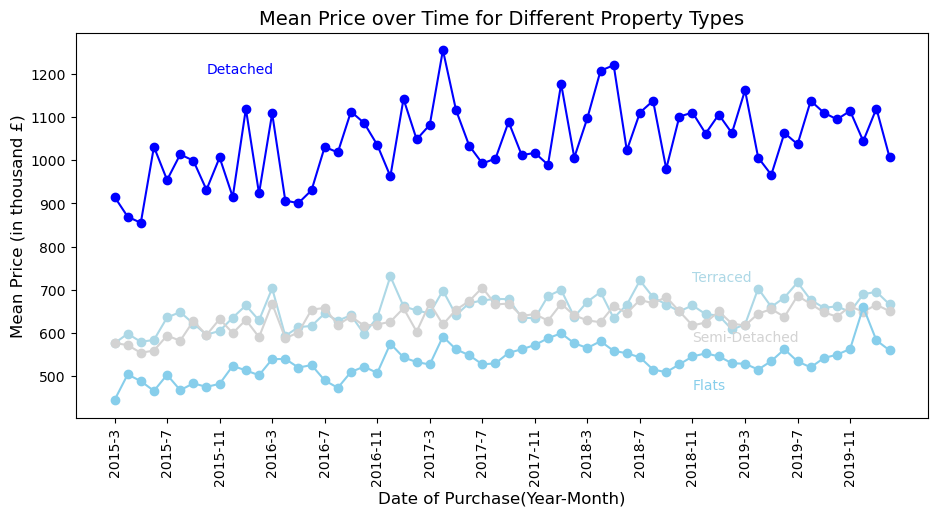

In [24]:
def plot_mean_price_over_time(df, property_types_to_keep, ax):
    color_map = {'D': 'blue', 'E': 'lightblue', 'F': 'skyblue', 'S': '#D3D3D3'}
    # Loop over each property type
    for prop_type in property_types_to_keep:
        df_filtered = df_copy[df_copy['Property_Type'] == prop_type].copy()
        # Convert 'Date_of_Transfer' to datetime
        df_filtered['Date_of_Transfer'] = pd.to_datetime(df_filtered['Date_of_Transfer'])
        # Extract year and month from 'Date_of_Transfer'
        df_filtered['Year'] = df_filtered['Date_of_Transfer'].dt.year
        df_filtered['Month'] = df_filtered['Date_of_Transfer'].dt.month
        # Group by year and month, calculate the mean price for each group
        grouped_df = df_filtered.groupby(['Year', 'Month'])['price'].mean().reset_index()
        # Convert price to thousands of pounds
        grouped_df['price'] /= 1000
        line_color = color_map.get(prop_type, 'lightblue')  
        ax.plot(grouped_df['Year'].astype(str) + '-' + grouped_df['Month'].astype(str), grouped_df['price'], marker='o', linestyle='-', label=prop_type, color=line_color)
        # Add labels on the lines
        if prop_type == 'D':
            ax.text('2015-10', 1200, 'Detached', fontsize=10, color=line_color)
        elif prop_type == 'T':
            ax.text('2018-11', 720, 'Terraced', fontsize=10, color=line_color)
        elif prop_type == 'S':
            ax.text('2018-11', 580, 'Semi-Detached', fontsize=10, color=line_color)
        elif prop_type == 'F':
            ax.text('2018-11', 470, 'Flats', fontsize=10, color=line_color)
    ax.set_xlabel('Date of Purchase(Year-Month)', fontsize=12)  # Reduced fontsize for axis label
    ax.set_ylabel('Mean Price (in thousand £)', fontsize=12)  # Reduced fontsize for axis label
    ax.set_title('Mean Price over Time for Different Property Types', fontsize=14)  # Reduced fontsize for title
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels
    ax.set_xticks(ax.get_xticks()[::4])
fig, ax = plt.subplots(figsize=(11, 5))
plot_mean_price_over_time(df, ['D', 'T', 'S', 'F'], ax)
plt.show()

This graph illustrates the average price of properties sold across different housing types, providing valuable insights into the dynamics of the housing market. It is evident that detached houses typically command higher prices, accompanied by greater price volatility compared to flats, semi-detached, or terraced houses. The average value of flats, semi-detached, or terraced houses tends to be below the £600 thousand pounds mark, with flats exhibiting the lowest average price. The volatility observed in detached house prices can be attributed to seasonal fluctuations, particularly heightened demand during the spring months as families seek to purchase and relocate before the onset of summer (Ngai & Tenreyro, 2014). This surge in demand often triggers competitive bidding wars among prospective buyers, leading to temporary price escalations despite a consistent level of supply. The premium attached to detached houses reflects consumers' heightened willingness to pay for the privacy and autonomy offered by standalone properties, which do not share walls with neighbors. Notably, a significant shift in the graph occurs after November 2017, defying the typical seasonal decline in property prices associated with colder months marked by reduced sales activity. During this period, flats and terraced houses experienced a positive three-month change in average prices, coinciding with the introduction of the First-Time Buyer's Relief policy. This policy intervention appears to have counteracted the usual market trend for these property types, while detached and semi-detached houses remained largely unaffected. 

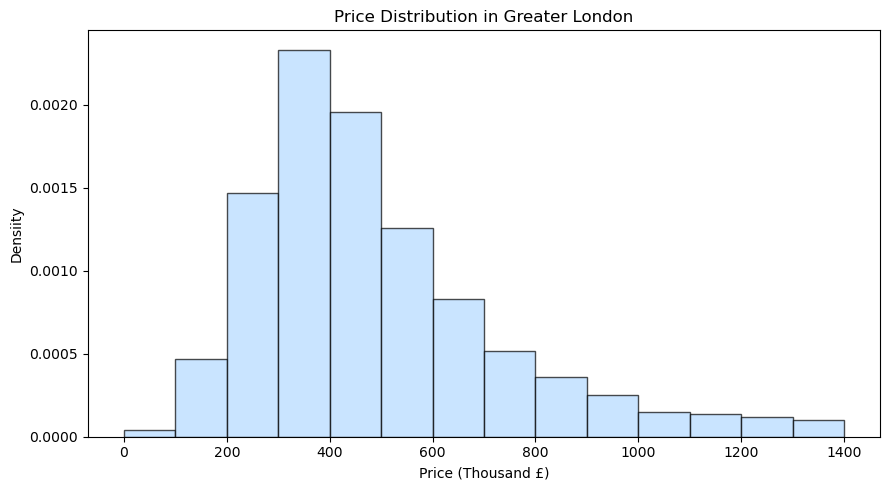

In [25]:
# Determine the 95th percentile of prices to identify outliers
price_95th_percentile = df_copy['price'].quantile(0.95)

# Filter the DataFrame to exclude outliers
df_filtered = df_copy[df_copy['price'] <= price_95th_percentile].copy()

# Convert prices to thousands for the filtered data
df_filtered.loc[:, 'price_thousands'] = df_filtered['price'] / 1000 

# Determine the minimum and maximum prices in the filtered dataset (in thousands)
min_price = df_filtered['price_thousands'].min()
max_price = df_filtered['price_thousands'].max()
bin_edges = list(range(int(min_price), int(max_price) + 100, 100)) 


plt.figure(figsize=(9, 5))
plt.hist(df_filtered['price_thousands'], bins=bin_edges, color='#b3d9ff', edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Price (Thousand £)')
plt.ylabel('Densiity')
plt.title('Price Distribution in Greater London')
plt.tight_layout()
plt.show()

This graph vividly illustrates the distribution of property values in the Greater London area, highlighting a pronounced skew towards the left side of the price range. The majority of property units are valued below £600 thousand pounds, indicative of a robust demand for more affordable housing options within the market. Specifically, there is a notable concentration of houses and flats purchased in the price range of £300 to £400 thousand pounds, underscoring the prevalence of properties within this relatively lower price bracket. The data reflects the targeted approach of the First-Time Buyer's Relief policy, which aims to facilitate entry into the housing market for first-time buyers by focusing on properties priced below £500 thousand pounds. By implementing a cap on the qualifying property value, the UK government strategically ensures that it can continue to generate tax revenue from higher-priced transactions, thereby contributing to efforts aimed at reducing the national deficit. This policy intervention aligns with broader economic objectives of promoting homeownership among first-time buyers while maintaining fiscal sustainability.

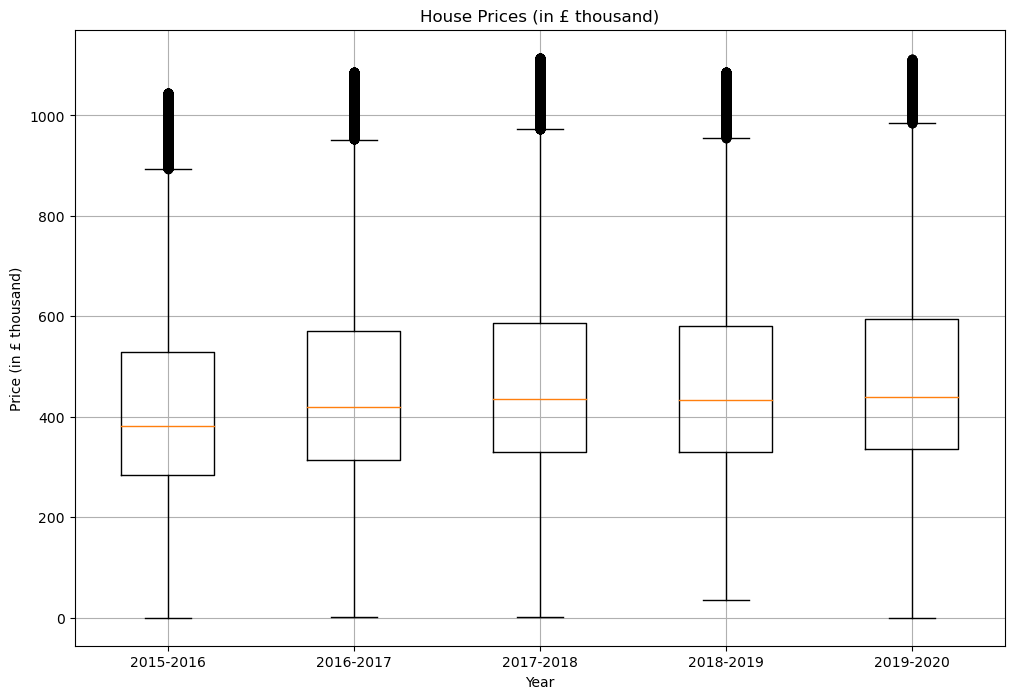

In [26]:
interval_labels = ['March 2015 - February 2016',
                   'March 2016 - February 2017',
                   'March 2017 - February 2018',
                   'March 2018 - February 2019',
                   'March 2019 - February 2020']

# Initialize an empty list to store all data without outliers
all_data_no_outliers = []
years = []

for interval_label in interval_labels:
    # Filter the DataFrame for the specified interval
    df_interval = df_copy[df_copy['Interval_1'] == interval_label]
    years.append(interval_label.split()[1]+ '-'+ interval_label.split()[4])
    # Extract the price data for the interval and divide by 1000
    data = df_interval['price'] / 1000 

    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove outliers from the data
    data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

    # Add data without outliers to the list
    all_data_no_outliers.append(data_no_outliers)

# Create the box plot with all intervals on the same graph
plt.figure(figsize=(12, 8))
plt.boxplot(all_data_no_outliers, labels=years)


plt.title('House Prices (in £ thousand)')
plt.xlabel('Year')
plt.ylabel('Price (in £ thousand)')
plt.grid(True)
plt.show()

This box plot provides insights into the general trends observed in the median price of properties sold across various intervals, independent of other influencing variables. Notably, the data reveals a consistent upward trajectory in the typical price of properties sold from March 2015 to March 2017. However, the rate of increase moderated from March 2017 to March 2018, with minimal fluctuations in median values observed during subsequent intervals. The implementation of the First-Time Buyer's Relief Policy does not correspond to a significant deviation in prices or overall trends within the housing market. This observation underscores the need for further research to explore the specific impact of the policy, particularly in discerning which types of housing may have been most affected by its implementation. 

In [27]:
# Calculate percentage change of mean price from one interval to the other
grouped_df = df_copy.groupby(['Property_Type', 'Before/After', 'Old/New'])
mean_price = grouped_df['price'].mean()
mean_price_unstacked = mean_price.unstack(level='Before/After')

# Calculate the percentage change
percentage_change = ((mean_price_unstacked['After'] - mean_price_unstacked['Before']) / mean_price_unstacked['Before']) * 100
percentage_change = percentage_change.rename('Mean_Percent_Change')
percentage_change = percentage_change.reset_index()

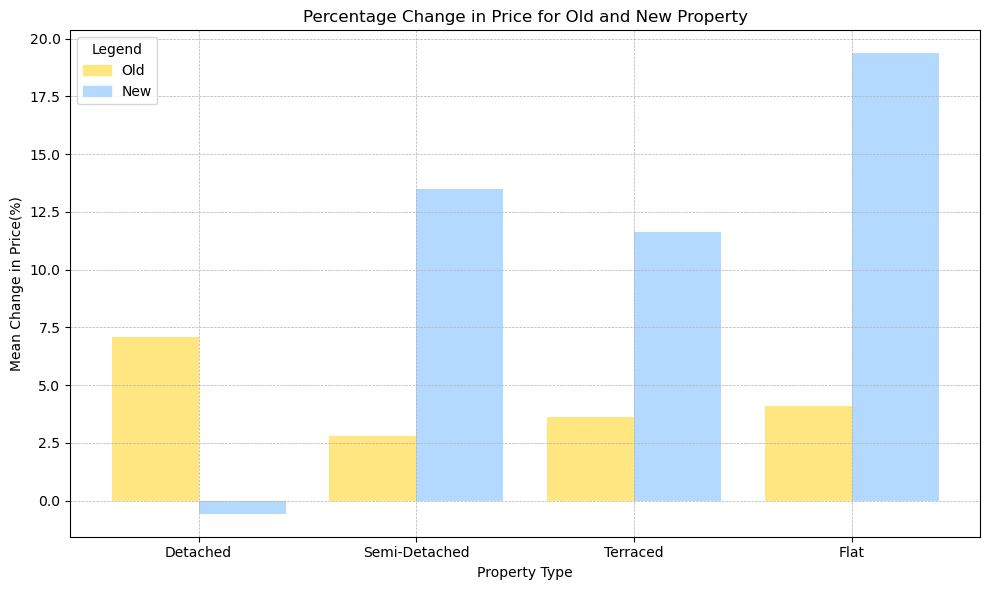

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
type_order = percentage_change['Property_Type'].unique()
age = percentage_change['Old/New'].unique()
colors = {'Y': '#b3d9ff', 'N': '#ffe680'}
bar_width = 0.4

for i in range(len(type_order)):
    p_type = type_order[i]
    p_data = percentage_change[percentage_change['Property_Type'] == p_type]
    n_values = p_data[p_data['Old/New'] == 'N']['Mean_Percent_Change'].values
    y_values = p_data[p_data['Old/New'] == 'Y']['Mean_Percent_Change'].values
    ax.bar([i - bar_width / 2] * len(n_values), n_values, width=bar_width, color=colors['N'], label='Old')
    ax.bar([i + bar_width / 2] * len(y_values), y_values, width=bar_width, color=colors['Y'], label='New')
    
ax.set_xticks(range(len(type_order)))
ax.set_xticklabels(['Detached', 'Semi-Detached', 'Terraced', 'Flat'])
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in ['N', 'Y']]
ax.legend(legend_handles, ['Old', 'New'], title='Legend')
ax.set_ylabel('Mean Change in Price(%)')
ax.set_xlabel('Property Type')
ax.set_title('Percentage Change in Price for Old and New Property')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

This graph presents a comparative analysis of the growth rates in average property prices for both old and new housing from March 2015 to March 2020. Across all four property types, the data predominantly reflects a positive change in prices for both categories of housing, with New detached houses being the sole exception, demonstrating a marginal decrease in average price over the specified period. Notably, new housing exhibits a notably higher rate of growth in comparison to old housing. New flats emerge as the standout category with the highest rate of growth, reaching an impressive 19% at the extreme value. Among old housing options, detached houses assert their resilience with a solid 6% price growth. These observed increases align closely with the potential policy effects of the First-Time Buyer's Relief, which specifically targets the market for more affordable housing options. Flats and terraced houses, typically lower-priced options, demonstrate the highest rates of price growth, further indicating how the policy might have stimulated demand and prices within these segments of the housing market.

# Project 2

## The Message

The implementation of First Time Buyers' Relief on November 22, 2017 corresponds to a significant short-term price spike of newly-built purchased flats and terraced houses in the Greater London Area, reflecting increased demand without corresponding changes in housing supply. These property types were relatively more affordable options in the market and potentially caught buyers' attention first because they met the eligibility criteria for tax relief. 

In [29]:
group_means = df_copy.groupby(['Property_Type', 'Old/New', 'Interval_2'])['price'].mean()
group_means = pd.DataFrame(group_means)
group_means.reset_index(inplace=True)

In [30]:
d_properties = group_means[group_means['Property_Type'] == 'D']
filtered_group_means = group_means[(group_means['Property_Type'] != 'D') | (group_means['Old/New'] != 'N')]
# Merge the original DataFrame with the DataFrame for property type 'D' on 'Interval_2' and 'Old/New'
merged_df = pd.merge(filtered_group_means, d_properties, on=['Interval_2', 'Old/New'], suffixes=('', '_D'), how='left')

# Calculate the price difference between each combination and store it in a new column
merged_df['price_difference'] = merged_df['price_D'] - merged_df['price']

In [31]:
# Remove rows with Property_Type 'D' and Old/New 'N' from the original DataFrame
filtered_group_means = group_means[(group_means['Property_Type'] != 'D') | (group_means['Old/New'] != 'N')] 

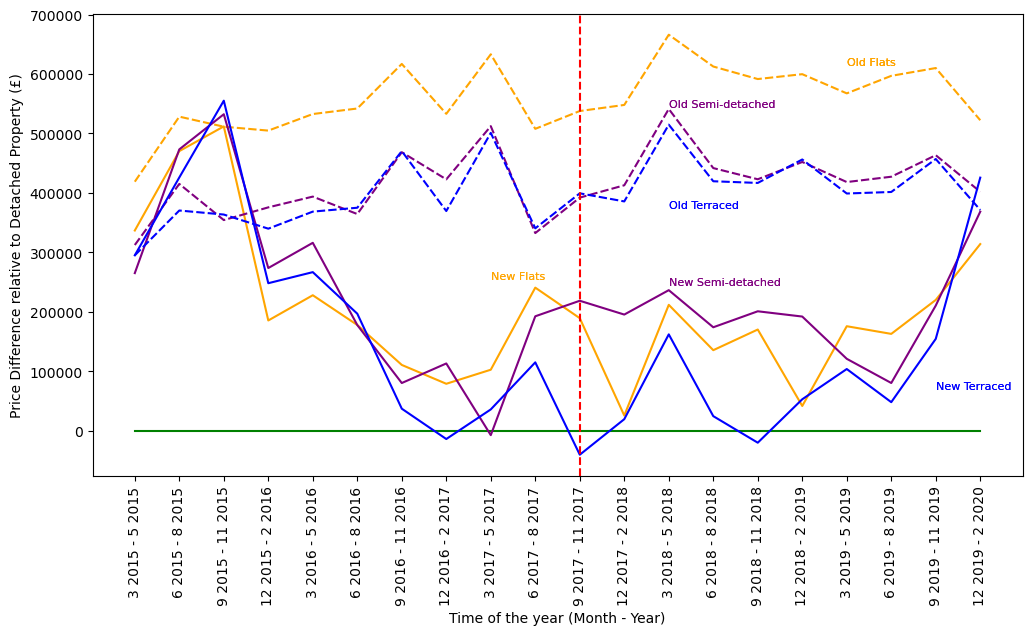

In [32]:
import seaborn as sns

# Define the order of intervals
intervals_order = ['3 2015 - 5 2015', '6 2015 - 8 2015', '9 2015 - 11 2015',
                   '12 2015 - 2 2016', '3 2016 - 5 2016', '6 2016 - 8 2016',
                   '9 2016 - 11 2016', '12 2016 - 2 2017', '3 2017 - 5 2017',
                   '6 2017 - 8 2017', '9 2017 - 11 2017', '12 2017 - 2 2018',
                   '3 2018 - 5 2018', '6 2018 - 8 2018', '9 2018 - 11 2018',
                   '12 2018 - 2 2019', '3 2019 - 5 2019', '6 2019 - 8 2019',
                   '9 2019 - 11 2019', '12 2019 - 2 2020']

# Sort the DataFrame based on the order of intervals
merged_df_sorted = merged_df.set_index('Interval_2').loc[intervals_order].reset_index()

# Create a dictionary to map property types to labels
property_labels = {'T': 'Terraced', 'F': 'Flats', 'S': 'Semi-detached'}
old_new_4 = {'N': 'Old', 'Y': 'New'}
# Define a color palette for each property type
palette = {'T': 'blue', 'D': 'green', 'F': 'orange', 'S': 'purple'}

# Plotting the price differences for different combinations of property type and old/new over each interval
line_plot = sns.lineplot(x='Interval_2', y='price_difference', hue='Property_Type', style='Old/New', data=merged_df_sorted, sort=False, palette=palette)

# Set the x-axis labels rotation
plt.xticks(rotation=90)

# Add a vertical line at '9 2017 - 11 2017'
plt.axvline(x='9 2017 - 11 2017', color='red', linestyle='--')

# Add title to x-axis
plt.xlabel('Time of the year (Month - Year)')
plt.ylabel('Price Difference relative to Detached Property (£)')
# Adjust figure size
plt.gcf().set_size_inches(12, 6)

line_plot.legend_.remove()


label_coordinates = {  # Specify x and y coordinates for each label
    'Terraced': {'New': ('9 2019 - 11 2019', 75000), 'Old': ('3 2018 - 5 2018', 380000)},
    'Detached': {'New': ('6 2015 - 8 2015', 650000), 'Old': ('9 2019 - 11 2019', 750000)},
    'Flats': {'New': ('3 2017 - 5 2017', 260000), 'Old': ('3 2019 - 5 2019', 620000)},
    'Semi-detached': {'New': ('3 2018 - 5 2018', 250000), 'Old': ('3 2018 - 5 2018', 550000)}
}

for line, prop_type, linestyle in zip(line_plot.lines, merged_df_sorted['Property_Type'], merged_df_sorted['Old/New']):
    if prop_type in property_labels:  # Check if the property type is valid
        label_x, label_y = label_coordinates[property_labels[prop_type]][old_new_4[linestyle]]
        plt.text(label_x, label_y, old_new_4[linestyle] + ' ' + property_labels[prop_type], color=palette[prop_type], horizontalalignment='left', verticalalignment='center', fontsize=8)
        if linestyle == 'N':
            plt.text(label_x, label_y, '', color=palette[prop_type], horizontalalignment='right', verticalalignment='center', fontsize=8)

plt.show()

This graph illustrates the price difference between various property types and Detached Houses over three-month intervals. However, this graph takes into account whether the property is a new build or not. Detached Properties exhibited minimal price difference post-policy implementation. Therefore, average prices for each property type are compared to Detached Houses, represented by the green line, which indicates no change, and this reflects the nominal impact of the policy. Examining the graph section marked by the red line indicating November 22nd, 2017, the day of FTB Relief implementation, reveals significant trends. New terraced houses and flats experienced notable price increases compared to Detached Houses, with new flats almost matching and new terraced houses briefly surpassing Detached House prices. These property types, meeting relief requirements, became highly appealing options for first-home purchases, driving demand. However, this surge resulted in price increases only initially, followed by a subsequent decline as price differences reemerged, indicative of market adjustments coinciding with seasonal patterns, particularly as the 'cold season' commenced and relocation activity slowed.

## Maps and Interpretations

In [33]:
import geopandas as gpd

file_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp"
district_df = gpd.read_file(file_path)

In [34]:
df_maps = df_copy.groupby(['Before/After', 'District'])['price'].mean()
df_maps = df_maps.reset_index()
df_maps = df_maps.rename(columns={'price': 'Price_Mean', 'District': 'DISTRICT'})

In [35]:
#average price change for map 2
interval1 = 'Before'
interval2 = 'After'
df_interval1 = df_maps[df_maps['Before/After'] == interval1]
df_interval2 = df_maps[df_maps['Before/After'] == interval2]

# Merge the two DataFrames based on the 'DISTRICT' column
merged_df_2 = pd.merge(df_interval1, df_interval2, on='DISTRICT', suffixes=('_interval1', '_interval2'))

# Calculate the percentage change in price
merged_df_2['Percentage_Change'] = ((merged_df_2['Price_Mean_interval2'] - 
                                   merged_df_2['Price_Mean_interval1']) / merged_df_2['Price_Mean_interval1']) * 100

# Create a new DataFrame with 'DISTRICT' and 'Percentage_Change' columns
percentage_change_df = merged_df_2[['DISTRICT', 'Percentage_Change']]

In [36]:
district_df["DISTRICT"] = district_df["DISTRICT"].str.title().str.strip()

percentage_change_df.loc[:, "DISTRICT"] = percentage_change_df["DISTRICT"].str.title().str.strip()

In [37]:
districts = district_df.merge(percentage_change_df, left_on="DISTRICT", right_on="DISTRICT", how="inner")

In [38]:
#map 1, average price of property in london district
grouped_district_mean = df_copy.groupby('District')['price'].mean().reset_index()
grouped_district_mean = grouped_district_mean.rename(columns={'price': 'Price_Mean', 'District': 'DISTRICT'})

# Convert 'price' column to mean integers and then divide by 1000
grouped_district_mean['Price_Mean'] = (grouped_district_mean['Price_Mean'].astype(int) // 1000)
grouped_district_mean = grouped_district_mean.rename(columns={'Price_Mean': 'Price_Mean (in thousands)'})

In [39]:
grouped_district_mean["DISTRICT"] = grouped_district_mean["DISTRICT"].str.title().str.strip()
districts_price = district_df.merge(grouped_district_mean, left_on="DISTRICT", right_on="DISTRICT", how="inner")

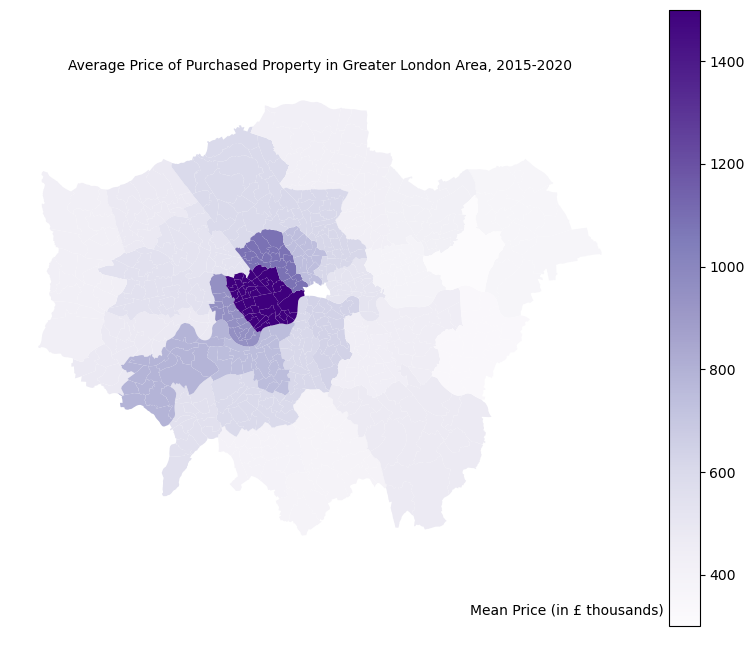

In [40]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts_price.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Price_Mean (in thousands)', legend=True, cmap='Purples',
    vmin=300, vmax=1500
)


gax.annotate('Mean Price (in £ thousands)', xy=(0.47, 0.07), xycoords='figure fraction')
gax.set_title("Average Price of Purchased Property in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

This map illustrates the average prices of properties purchased in each district within the Greater London Area, revealing distinct divisions in housing costs. East London regions typically offer more affordable housing options, while districts in the west tend to be more expensive.  East London has some of the most low-income districts with high degrees of deprivation. These pricing disparities remained consistent throughout the five-year period under study. Areas such as the City of Westminster, Chelsea, and Camden, traditionally exclusive areas with lots of parks, cultural events and restaurants, stood out as the most desirable and priciest locations in London, with average property prices reaching up to 1.5 million (Manton, 2023). As the policy did not target this high-end sector of the market, there should be no significant price changes observed in these areas. In the east of London, housing tends to be more affordable, presenting potential opportunities for first-time homebuyers under the FTB Relief scheme, which could potentially cause increase in demand for housing within those districts and therefore in the housing prices. The values for the City of London borough are missing on all maps because it is not a residential district.

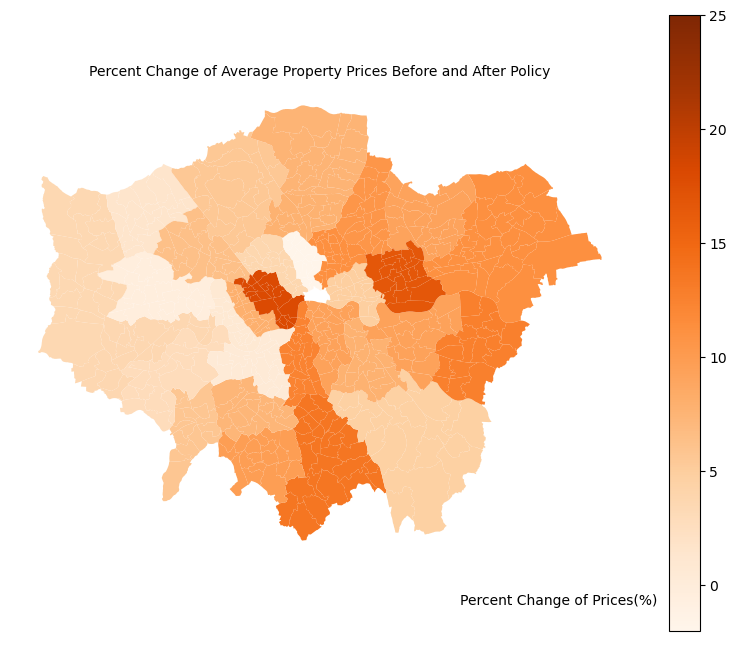

In [153]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Percentage_Change', legend=True, cmap='Oranges',
    vmin=-2, vmax=25
)


gax.annotate('Percent Change of Prices(%)', xy=(0.46, 0.08), xycoords='figure fraction')
gax.set_title("Percent Change of Average Property Prices Before and After Policy", fontsize=10)
plt.axis('off')
plt.show()

This map highlights Hammersmith and Fulham and Newham as the London districts where the value of purchased properties surged by nearly 20% before and after the policy implementation. However, the average price of property in Hammersmith and Fulham is way above threshold indicated by the UK Government for fist-time buyers to qualify for the tax relief but it is a popular area for young individuals and families (Masey, 2019). In Neham, however, determining whether this spike can be solely attributed to increased demand resulting from the FTB Relief policy is challenging due to ongoing gentrification process (Guardian readers & Perry, 2016). Many individuals residing in more central London areas opt to relocate to Newham or nearby areas because it offers the most affordable housing while still being close to the city center. Increased housing demand led to price hikes in the majority of districts in East London.

In [42]:
number_of_purchases_per_district = df_copy.groupby('District').size()

number_of_purchases = pd.DataFrame({
    'DISTRICT': number_of_purchases_per_district.index,
    'Number of Purchases': number_of_purchases_per_district.values
})

In [43]:
number_of_purchases["DISTRICT"] = number_of_purchases["DISTRICT"].str.title().str.strip()
districts_number = district_df.merge(number_of_purchases, left_on="DISTRICT", right_on="DISTRICT", how="inner")

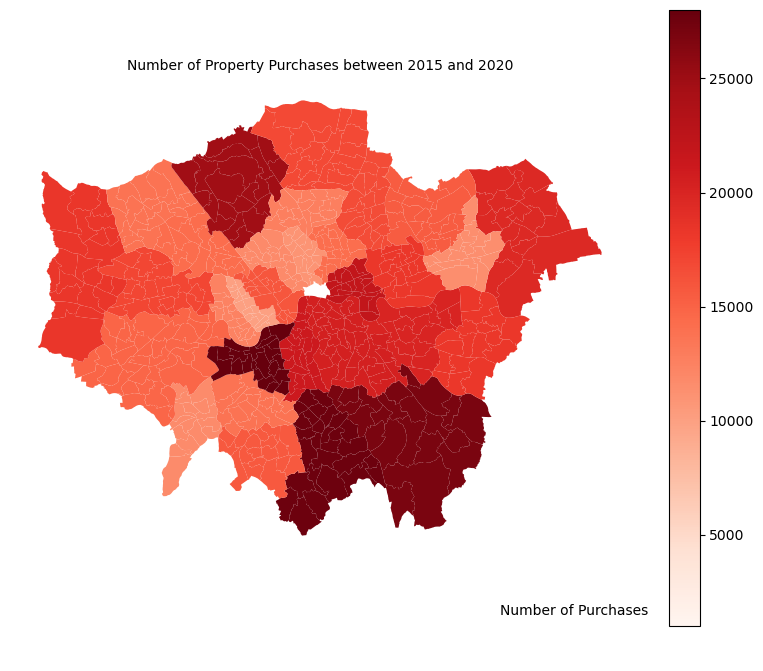

In [175]:
fig, gax = plt.subplots(figsize=(10, 8))

districts_number.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Number of Purchases', legend=True, cmap='Reds',
    vmin=1000, vmax=28000
)

gax.annotate('Number of Purchases', xy=(0.5, 0.07), xycoords='figure fraction')
gax.set_title("Number of Property Purchases between 2015 and 2020", fontsize=10)
plt.axis('off')
plt.show()

The map illustrates the distribution of property purchases across various districts in London. The majority of purchases occurred in three peripheral districts of London and one district within the central area. Croydon, Bromley, and Barnet, situated in the outskirts, are suburban areas known for attracting residents seeking homeownership while maintaining proximity to the city. Wandsworth, located in inner London, stands out as the most sought-after residential area (Gulliver, 2022). 

Notably, Newham experienced a significant increase in property prices following the implementation of First Time Buyers’ (FTB) Relief, despite not leading in the total number of property transactions between March 2015 and March 2020. While the volume of purchases in other districts remains relatively similar, districts in East London observed a more pronounced percentage change in prices. This observation suggests that the policy's implementation did not alter demand, as evidenced by sustained or increased purchasing activity despite price fluctuations, particularly in East London.

In [45]:
total_purchases_district = df_copy.groupby('District').size()

new_flats_district_df = df_copy[(df_copy['Property_Type'] == 'F') & (df_copy['Old/New'] == 'Y')]

percentage_flat_district = (new_flats_district_df.groupby('District').size() / total_purchases_district) * 100

percentage_flat_district_df = pd.DataFrame({
    'DISTRICT': percentage_flat_district.index,
    'Share of New Flats': percentage_flat_district.values
})

In [46]:
percentage_flat_district_df["DISTRICT"] = percentage_change_df["DISTRICT"].str.title().str.strip()

districts_flats = district_df.merge(percentage_flat_district_df, left_on="DISTRICT", right_on="DISTRICT", how="inner")

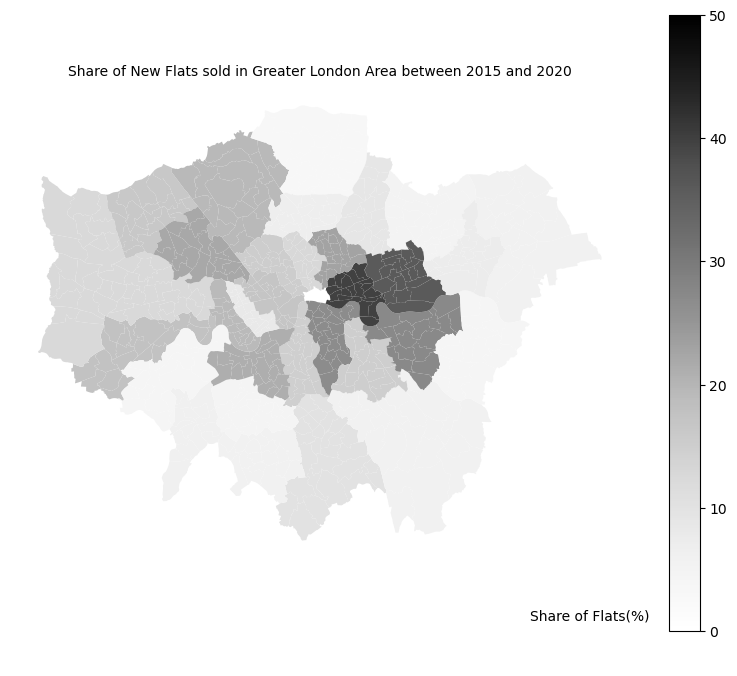

In [177]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts_flats.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Share of New Flats', legend=True, cmap='Greys',
    vmin=0, vmax=50
)

gax.annotate('Share of Flats(%)', xy=(0.53, 0.07), xycoords='figure fraction')
gax.set_title("Share of New Flats sold in Greater London Area between 2015 and 2020", fontsize=10)
plt.axis('off')
plt.show()

This map illustrates the prevalence of new flat purchases in inner London, reflecting the dense population in these areas. Given that the FTB Relief policy targets lower-priced and smaller properties, flats emerge as a natural preference. However, juxtaposing this with the preceding maps, it becomes apparent that the choice of flats is primarily driven by their affordability. While districts in West London also feature a substantial proportion of new flats, their prices did not experience significant surges. This can be attributed to the prohibitively high cost of housing in these areas, which exceeds the means of the average buyer.  It is important to note that this map does not necessarily suggest that the FTB Relief directly caused an increase in demand followed by a supply increase. Instead, it showcases how the substantial supply of housing, particularly in inner districts of East London, along with a significant share of new properties, contributes to maintaining affordability in Newham. The flow of first-time buyers did not initiate this shift; rather, it reflects broader trends and mechanisms within the Greater London housing market that are beyond governmental control and influence pricing. These areas were already attracting new residents before the implementation of the policy, but they became the primary focus for potential buyers once the policy took effect.

# Project Three

## Original Data Set

The original data set from HM Land Registry, the non-ministerial department that monitors and documents every housing transaction in England and Wales and has an open database for all purchases since 1995 (HM Land Registry Open Data, 2023). To begin with, each transaction had the information about where the house is located, time of transaction, and some other information, such as type of property and type of tenure. The research investigates the effect of FTB Relief, so different time variables were created and used for graphs, such as whether the purchase happened before or after the policy, intervals with duration of three and four months.

However, this data set considers mainly the demand side of purchases, ignoring the supply side. There is also no information on the area, where each house is situated. Therefore, getting more information on differences between each borough might help understand why more houses are purchased in certain places and also why some houses are on average more expensive. Additional analyses and more controlled variables can indicate which subsection of the housing market was affected by the FTB Relief the most. 

## Potential Data to Scrape

The data about urban green spaces can add a lot of additional information to this research and it is not available for a download as a file. Many economists and experts on property discuss how having green spaces in the area adds 'park premium' to the average price of the house, making them more expensive. Number of green spaces near the house could have affected to what extent there was a change in demand for housing in certain boroughs after the FTB Relief implementation. This additional data set helps analyse how the number of green spaces correlates with the average housing price and number of purchases in each borough, as more families and young parents are trying to purchase a house or a flat near parks or gardens.  Areas with many parks tend to be relatively more expensive, therefore prices should not increase as much, as the tax relief did not target luxurious housing markets.

The data on parks can be scrapped from the Wikipedia website on Listed parks and gardens in Greater London, which provides a listing and classification system for historic parks and gardens.

## Potential Challenges

The primary challenge is the way the data is represented because there are multiple tables, where each table has data for an individual borough. Some boroughs have also no table because there are no registered parks or gardens in that area, which can lead to missing values in the web scraped data set. Another challenge in using data from this Wikipedia page is that the scapped data set has each individual park and its location, whereas the total number of parks for each borough is more useful for this analysis and the future merge because all analysis are conducted on borough level. Some borough names differ among the original data and web scraped data, which should be taken into account.

## Scraping Data from a Website

To web scrape the data about parks, a list of boroughs is created, where the name order of boroughs is the same as the order of the tables for each borough on the Wikipedia website. Then while and for loop is used to create one large data frame, where that order is used to indicate the borough where each park is located.

Groupby and size fuctons are used to find the total number of parks in each borough. Waltham Forest, Kingston Upon Thames and Barking And Dagenham are added seperately, as these boroughs do not have any parks or gardens and are not listed on the web page but missing values would disrupt the merge process.

The name of Westminster borough is changed to 'City Of Westminster', as it is the name used in other data sets. 

In [48]:
import requests

In [49]:
from bs4 import BeautifulSoup

### Parks

In [50]:
# We need to access the website first 

web_url = 'https://en.wikipedia.org/wiki/Listed_parks_and_gardens_in_Greater_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response_p = requests.get(web_url, headers=headers)

In [51]:
# We need to find all tables with format RM_table beccause that is where the information is stored

soup_object_p = BeautifulSoup(response_p.content)
data_table_parks = soup_object_p.find_all('table', 'RM_table')

In [52]:
# Create an empty dataframe with columns of the tables
parks_df = pd.DataFrame(columns = ['borough','name', 'location', 'type', 'completed', 'geo coord'])

In [53]:
#There is a seperate table for each borough listed below, total number is 30

boroughs = ['Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 
            'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 
            'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
            'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
            'Sutton', 'Tower Hamlets', 'Wandsworth', 'Westminster']

In [54]:
#Create a data frame with each park, its location, its borough and other information

i = 0 
while i < 30:
    all_values_parks = data_table_parks[i].find_all('tr')
    borough = boroughs[i]
    for row in all_values_parks[1:]:
        lst = []
        values = row.find_all('td') 
        name = values[5].text.strip()
        location = values[0].text
        type1 = values[1].text
        completed = values[2].text
        coord = values[3].text.strip()  
        
        # Append a new row to the DataFrame using .loc
        parks_df.loc[len(parks_df)] = [borough, name, location, type1, completed, coord]
    
    i = i + 1

In [55]:
# Calculate total numbr of parks for each borough, some boroughs do not have any parks 
parks_by_borough = parks_df.groupby('borough').size().reset_index(name='num_parks')
parks_by_borough["borough"] = parks_by_borough["borough"].str.title().str.strip()
districts_with_zero_parks = ['Waltham Forest', 'Kingston Upon Thames', 'Barking And Dagenham']

# Create a DataFrame for districts with 0 parks
districts_with_zero_parks_df = pd.DataFrame({'borough': districts_with_zero_parks, 'num_parks': 0})

# Concatenate the two DataFrames
parks_by_borough_new = pd.concat([parks_by_borough, districts_with_zero_parks_df], ignore_index=True)

In [56]:
district_df["DISTRICT"] = district_df["DISTRICT"].str.title().str.strip()
parks_by_borough_new["borough"] = parks_by_borough_new["borough"].str.title().str.strip()
parks_by_borough_new['borough'] = parks_by_borough_new['borough'].replace('Westminster', 'City Of Westminster')
borough_parks = district_df.merge(parks_by_borough_new, left_on="DISTRICT", right_on="borough", how="inner")

## Visualizing the Scraped Dataset

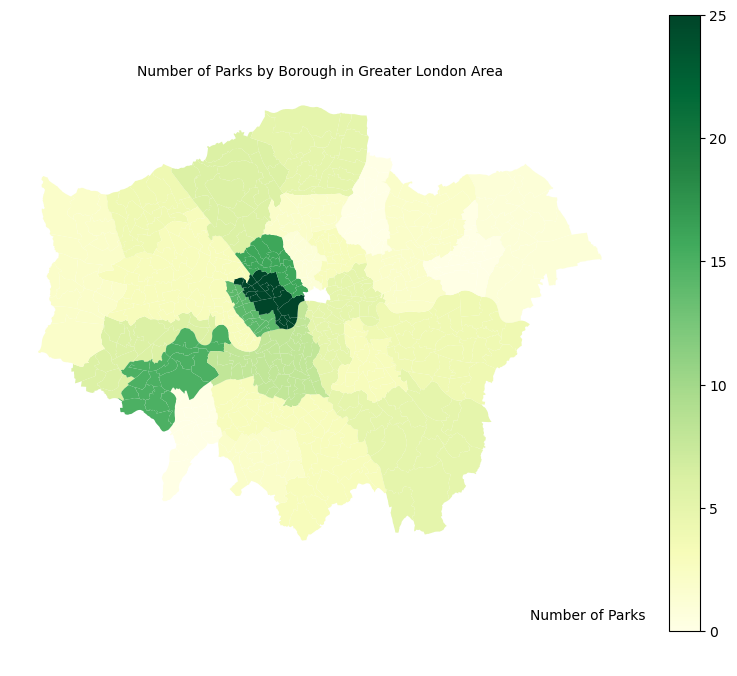

In [160]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')
borough_parks.plot(
    ax=gax, edgecolor='black', linewidth=0, column='num_parks', legend=True, cmap='YlGn',
    vmin=0, vmax=25
)


gax.annotate('Number of Parks', xy=(0.53, 0.07), xycoords='figure fraction')
gax.set_title("Number of Parks by Borough in Greater London Area", fontsize=10)
plt.axis('off')
plt.show()

This map highlights an interesting economic trend, particularly in West London. It shows that areas with minimal price increases before and after the implementation of first-time buyer policies, yet maintain the highest average prices, are often located in boroughs with extremely large number of parks. This suggests that homes near parks tend to command a premium, emphasizing the role of amenities in driving property values. These areas did not experience significant changes in the context of policy interventions such as first-time buyer initiatives, which underscores the importance of urban features like parks in shaping housing market dynamics.

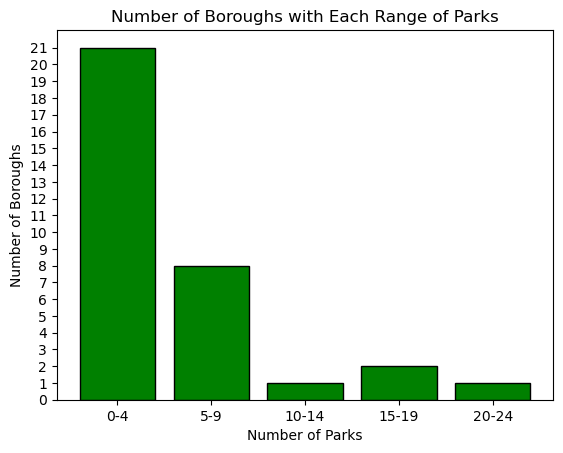

In [58]:
boroughs = parks_by_borough_new['borough']
num_parks = parks_by_borough_new['num_parks']

# Define bins
bins = [0, 5, 10, 15, 20, 25]

# Count the number of boroughs falling within each bin
hist, _ = np.histogram(num_parks, bins=bins)

# Plot the bar chart
plt.bar(range(len(hist)), hist, align='center', color='green', edgecolor='black')
plt.xticks(range(len(bins) - 1), [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)])
plt.xlabel('Number of Parks')
plt.ylabel('Number of Boroughs')
plt.title('Number of Boroughs with Each Range of Parks')

# Set y-axis ticks to integers only
plt.yticks(np.arange(max(hist) + 1))

plt.show()

The distribution of parks across Greater London boroughs underscores a significant economic phenomenon. Most boroughs exhibit a scarcity of parks, typically numbering between 0 to 4 within their boundaries, with only a few exceptions boasting a higher concentration of green spaces. Most property purchased before and after the policy implementation is located in boroughs that fall within the first category.

In [72]:
df_copy["District"] = df_copy["District"].str.title().str.strip()
df_new = pd.merge(df_copy, parks_by_borough_new, left_on='District', right_on='borough', how='inner')

In [74]:
copy_3 = df_new.copy()
copy_3['price'] = copy_3['price'] / 1000
average_price_by_area = copy_3.groupby('borough')['price'].mean()

In [75]:
number_of_parks_borough = df_new.groupby('borough')['num_parks'].mean()

In [76]:
data_4 = {
    'Average Price (thousand £)': average_price_by_area,
    'Number of Parks': number_of_parks_borough
}

result_df_4 = pd.DataFrame(data_4).reset_index()

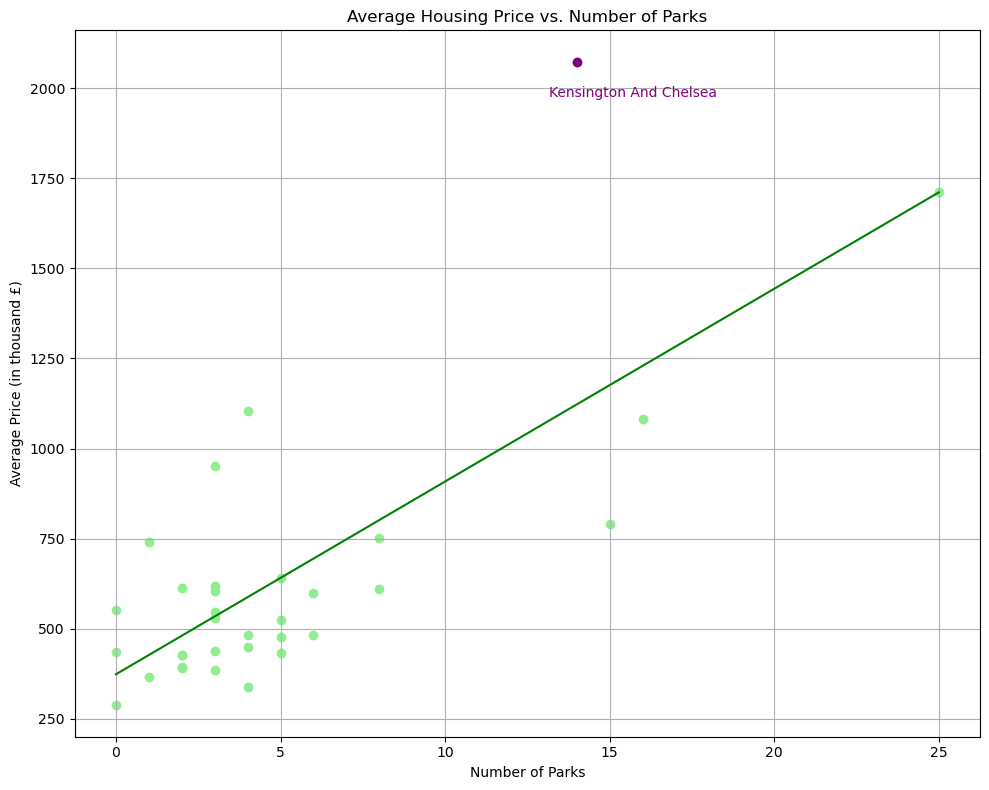

In [78]:
fig, ax = plt.subplots(figsize=(10, 8))


ax.scatter(result_df_4['Number of Parks'], result_df_4['Average Price (thousand £)'], color='lightgreen', label='Data Points')

# Plot Kensington and Chelsea data point separately
kensington_chelsea_index = result_df_4[result_df_4['borough'] == 'Kensington And Chelsea'].index
ax.scatter(result_df_4.loc[kensington_chelsea_index, 'Number of Parks'], 
           result_df_4.loc[kensington_chelsea_index, 'Average Price (thousand £)'], 
           color='purple', label='Kensington And Chelsea')

# Plot the linear trendline
coefficients = np.polyfit(result_df_4['Number of Parks'], result_df_4['Average Price (thousand £)'], 1)
trendline_x = np.array([min(result_df_4['Number of Parks']), max(result_df_4['Number of Parks'])])
trendline_y = np.polyval(coefficients, trendline_x)
ax.plot(trendline_x, trendline_y, color='green', label='Trendline')


ax.set_xlabel('Number of Parks')
ax.set_ylabel('Average Price (in thousand £)')
ax.set_title('Average Housing Price vs. Number of Parks')
ax.grid(True)

for i in kensington_chelsea_index:
    ax.annotate('Kensington And Chelsea', 
                xy=(result_df_4.loc[i, 'Number of Parks'], result_df_4.loc[i, 'Average Price (thousand £)']), 
                xytext=(-20, -25), textcoords='offset points', color = 'purple')

plt.tight_layout()
plt.show()

Each dot on this diagram represents a borough. The relationship between park abundance and average housing prices across Greater London reveals how boroughs with a higher number of parks generally tend to command higher average property prices, Kensington and Chelsea stands out as a unique case. Despite not having the largest number of parks among boroughs, its remarkable count of 14 parks is noteworthy. Nonetheless, it remains the most expensive in terms of housing, underscoring its exceptional status as London's most luxurious and exclusive property market. This discrepancy highlights the complex interplay between amenities like parks and the prestigious reputation of certain areas within the city's real estate landscape.

## Adding a New Dataset

The new dataset contains information on total affordable housing completions by financial year in each London borough since 1991/92. It includes homes funded through programs managed by the GLA (and formerly by the Homes and Communities Agency), as well as homes funded through other sources and programs. This dataset defines affordable housing as the sum of social rent, affordable rent, intermediate rent, and low-cost home ownership. Additionally, it delineates new affordable homes as additional housing units provided to specified eligible households whose needs are unmet by the market. The data is sourced from the Homes and Communities Agency and Local Authorities, providing comprehensive insights into the affordable housing landscape in London.

By merging the new and original datasets based on time intervals and borough level, the analysis gains a comprehensive understanding of the impact of FTB Relief on the housing market in the Greater London Area. This integration enables a thorough examination of how FTB Relief influenced housing market dynamics across various property types, considering both transactional activity from the original HM Land Registry dataset and affordable housing completions from the new dataset. Importantly, the inclusion of the new dataset allows for a partial observation of the supply side of the housing market. This enables an analysis of to what extent the effect of FTB Relief policy on the average price of the housing purchased could have been affected by the changes to the affordable housig supply. By assessing how changes in affordable housing completions correlate with fluctuations in housing prices in different boroughs and property types, this holistic approach provides valuable insights into the multifaceted dynamics of the housing market response to policy interventions.

In [103]:
second_dataset_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/dclg-affordable-housing-borough.csv"

colnames_new = ['Code', 'Area', 'Year', 'Affordable Housing Supply']

df_supply = pd.read_csv(second_dataset_path, header=None, names=colnames_new)

filtered_df_supply = df_supply[df_supply['Year'].between('2015-16', '2019-20')]

In [104]:
filtered_df_supply.loc[:, "Area"] = filtered_df_supply["Area"].str.title().str.strip()

In [105]:
def convert_date_range(date_range):
    parts = date_range.split('-')
    
    # Extract the start and end years from the date range
    start_year = parts[0]
    end_year = parts[1]
    
    # the end year is represented with two digits, convert to 'YYYY'
    if len(end_year) == 2:
        end_year = '20' + end_year

    # Generate formatted date range
    formatted_date_range = f"March {start_year} - February {end_year}"
    
    return formatted_date_range



# The conversion function to the 'Year' column using .loc[]
filtered_df_supply.loc[:, 'Year'] = filtered_df_supply['Year'].apply(lambda x: convert_date_range(x))

In [107]:
filtered_df_supply_copy = filtered_df_supply.copy()
filtered_df_supply_copy.loc[filtered_df_supply_copy["Area"] == 'Westminster', "Area"] = 'City Of Westminster'
final_df = pd.merge(df_new, filtered_df_supply_copy, left_on=['District', 'Interval_1'], right_on=['Area', 'Year'], how='inner')

In [112]:
final_df_copy = final_df.copy()
final_df_copy['Affordable Housing Supply'] = final_df_copy['Affordable Housing Supply'].str.replace(',', '').astype(int)
final_df_copy['Affordable Housing Supply'] = final_df_copy['Affordable Housing Supply'].astype(int)

# Divide 'price' column by 1000

final_df_copy['price'] /= 1000

average_price_by_area = final_df_copy.groupby('Area')['price'].mean()

# Group by 'Area' and calculate the average price for each group

total_supply_by_year = final_df_copy.groupby(['Area', 'Year'])['Affordable Housing Supply'].mean()

# Reset the index to make the grouped columns accessible

total_supply_by_year = total_supply_by_year.reset_index()

# Calculate total supply by year

total_supply_by_area_2 = total_supply_by_year.groupby('Area')['Affordable Housing Supply'].sum()

# Combine average price with total supply by area

data_3 = {
    'Average Price (thousand £)': average_price_by_area,
    'Affordable Housing Supply': total_supply_by_area_2
}

# Create a new DataFrame
result_df_3 = pd.DataFrame(data_3).reset_index()

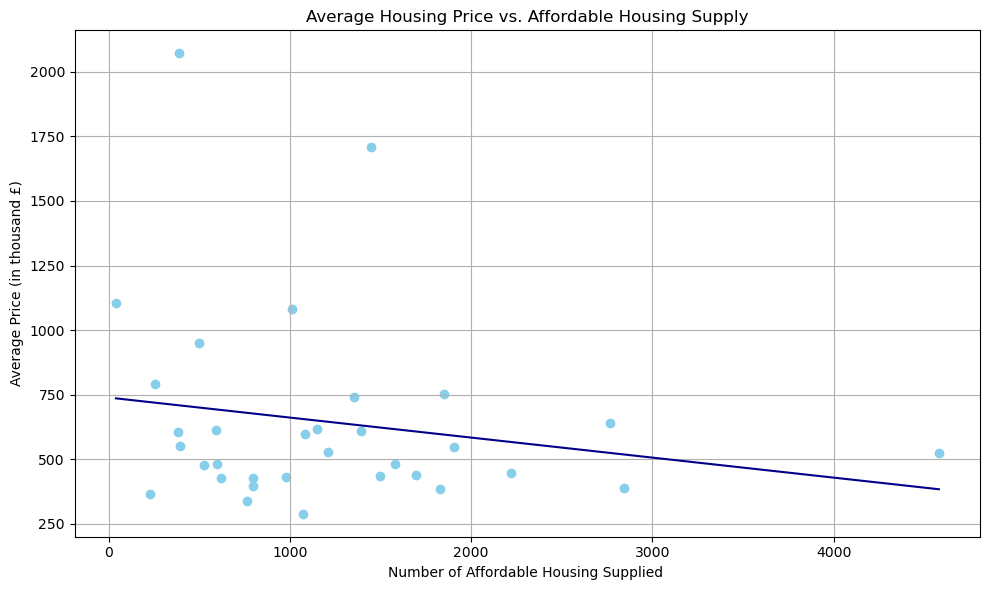

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(result_df_3['Affordable Housing Supply'], result_df_3['Average Price (thousand £)'], color='skyblue', label='Data Points')
plt.xlabel('Number of Affordable Housing Supplied ')
plt.ylabel('Average Price (in thousand £)')
plt.title('Average Housing Price vs. Affordable Housing Supply')

# Fit a linear trendline
coefficients = np.polyfit(result_df_3['Affordable Housing Supply'], result_df_3['Average Price (thousand £)'], 1)
trendline_x = np.array([min(result_df_3['Affordable Housing Supply']), max(result_df_3['Affordable Housing Supply'])])
trendline_y = np.polyval(coefficients, trendline_x)
plt.plot(trendline_x, trendline_y, color='darkblue', label='Trendline')

plt.grid(True)
plt.tight_layout()
plt.show()

The graph highlights a clear negative relationship between the number of affordable housing units supplied in a borough, where each dot is a specific area, and the average price of houses, underscoring the impact of First Time Buyers’ (FTB) Relief on the Greater London Area's housing market. This strong correlation suggests that areas with more affordable housing tend to experience lower housing prices. This observation holds significant policy implications, particularly considering that FTB Relief targets the lower-cost segment of the market. This graph implies that individuals should be drawn to areas higher availability of affordable housing, as they have lower average prices, because it maximizes the benefits of the policy. Ultimately, this underscores how FTB Relief should have affeted not only more affordable areas but areas with higher supply of affordable housing, reshaping the housing market landscape in alignment with policy objectives.

In [114]:
result_df_3["Area"] = result_df_3["Area"].str.title().str.strip()
result_df_3["Area"] = result_df_3["Area"].replace('Westminster', 'City Of Westminster')
result_df_3_map = district_df.merge(result_df_3, left_on="DISTRICT", right_on="Area", how="inner")

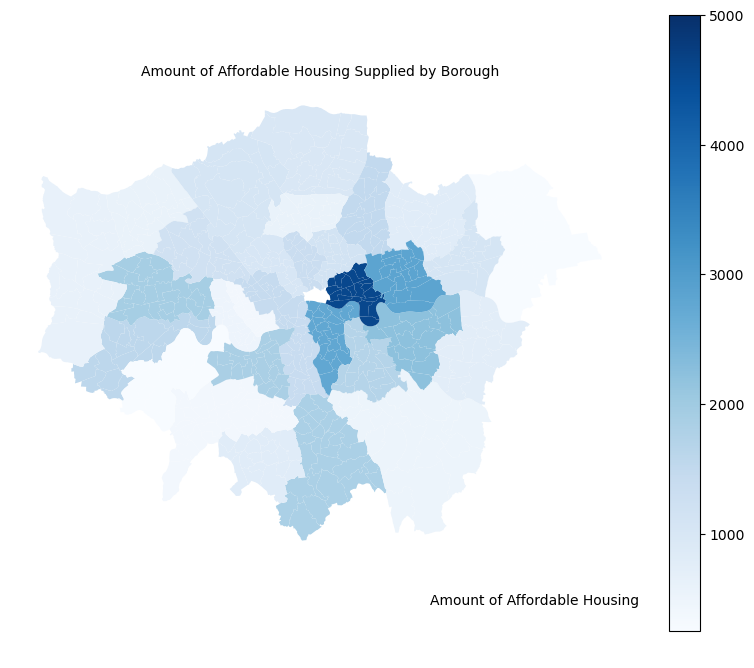

In [178]:
fig, gax = plt.subplots(figsize=(10, 8))

result_df_3_map.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Affordable Housing Supply', legend=True, cmap='Blues',
    vmin=250, vmax=5000
)


gax.annotate('Amount of Affordable Housing', xy=(0.43, 0.08), xycoords='figure fraction')
gax.set_title("Amount of Affordable Housing Supplied by Borough", fontsize=10)
plt.axis('off')
plt.show()

The map highlights Tower Hamlets, Newham, and Southwark as significant hubs of affordable housing provision over five years, particularly in the context of First Time Buyers’ (FTB) Relief. From the previous analysis, Tower Hamlets and Newham exhibit similar characteristics, including the highest shares of new flats purchased among all London boroughs and comparable park amenities. However, while Newham experienced a notable price spike post-policy, Tower Hamlets saw only a minor price adjustment. This difference underscores larger affordable housing supply in Tower Hamlets, which counteracted potentially increased demand after FTB Relief and moderating price fluctuations. The contrasting outcomes highlight the importance of housing supply elasticity in shaping the economic impacts of policy interventions within urban housing markets.

In [116]:
total_supply_by_year_2 = total_supply_by_year.groupby('Year')['Affordable Housing Supply'].sum()

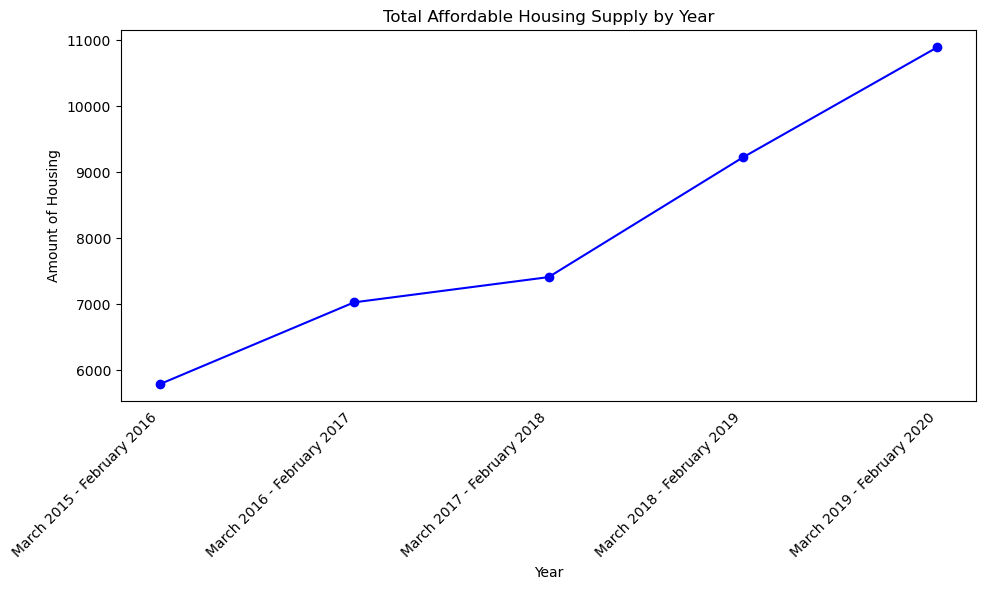

In [179]:
plt.figure(figsize=(10, 6))
total_supply_by_year_2.plot(marker='o', linestyle='-', color='blue')
plt.title('Total Affordable Housing Supply by Year')
plt.xlabel('Year')
plt.ylabel('Amount of Housing')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tight_layout()
plt.show()

The graph depicts a significant surge in the supply of affordable housing subsequent to the implementation of First Time Buyers’ (FTB) Relief in November 2017. This notable increase might signify a proactive response to the increased demand and rise in average housing prices caused by the policy intervention. The surge in affordable housing supply can highlight the responsiveness of the market to shifting demand dynamics, potentially reflecting an effort to meet the increased housing needs of first-time buyers incentivized by the policy. This dynamic might illustrate the crucial interplay between supply and demand forces within the housing market, highlighting the adaptability of the market to policy interventions aimed at enhancing housing affordability. Overall, the observed post-policy increase in affordable housing supply can underscore a strategic approach to address affordability concerns and accommodate the growing demand stimulated by FTB Relief.

In [142]:
total_purchases_by_area = final_df_copy.groupby('Area')['price'].count()
total_purchases_by_area  = total_purchases_by_area .reset_index()
total_purchases_by_area.rename(columns={'price': 'Total purchases'}, inplace=True)
total_purchases_by_area = pd.DataFrame(total_purchases_by_area)
result_df_5 = total_purchases_by_area.merge(result_df_3, left_on="Area", right_on="Area", how="inner")

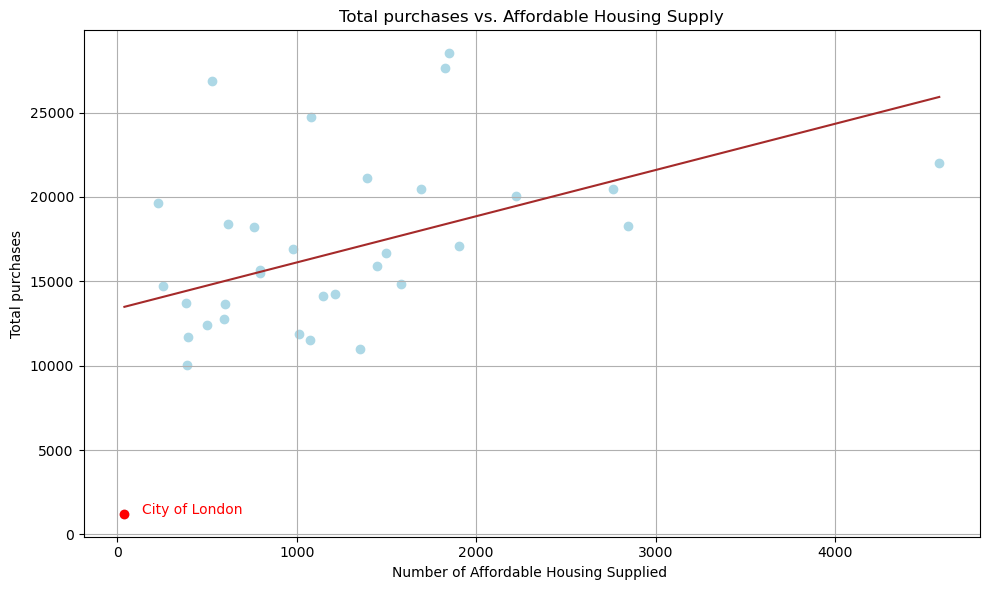

In [182]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Scatter plot for all boroughs
plt.scatter(result_df_5['Affordable Housing Supply'], result_df_5['Total purchases'], color='lightblue')

# Scatter plot for City of London separately
city_london_index = result_df_5[result_df_5['Area'] == 'City Of London'].index
plt.scatter(result_df_5.loc[city_london_index, 'Affordable Housing Supply'], 
            result_df_5.loc[city_london_index, 'Total purchases'], 
            color='red')

# Fit a linear trendline
coefficients = np.polyfit(result_df_5['Affordable Housing Supply'], result_df_5['Total purchases'], 1)
trendline_x = np.array([min(result_df_5['Affordable Housing Supply']), max(result_df_5['Affordable Housing Supply'])])
trendline_y = np.polyval(coefficients, trendline_x)
plt.plot(trendline_x, trendline_y, color='brown')

# Text annotation for City of London
plt.text(float(result_df_5.loc[city_london_index, 'Affordable Housing Supply'].iloc[0]) + 100, 
         float(result_df_5.loc[city_london_index, 'Total purchases'].iloc[0]), 
         'City of London', color='red')

plt.xlabel('Number of Affordable Housing Supplied ')
plt.ylabel('Total purchases')
plt.title('Total purchases vs. Affordable Housing Supply')
plt.grid(True)
plt.tight_layout()
plt.show()

The positive relationship observed between total house purchases and affordable housing supply in each borough reflects that the increase in affordable housing supply results in a rise of the quantity demanded, in line with economic theory. Each dot on the graph represents a borough. City of London is a borough with mostly commercial and government buildings, therefore there are not as many property options available for purchase or supplied overall. This graph suggests that more affordable housing availability strongly correlates with more home purchases within those boroughs. Following the First Time Buyers’ (FTB) Relief implementation, an increase in affordable housing supply likely drove increased house purchases in certain areas. This alignment with economic theory underscores how housing supply dynamics influence consumer behavior and shape the housing market landscape.

## Conclusion

The introduction of the First Time Buyers' Relief policy on November 22, 2017, had a significant impact only on housing prices of two property types in the Greater London Area. There was a significant short-term price surge in newly-built flats and terraced houses in the quarter including Novemebr 2017 which did not follow the usual trend of price decrease during cold months. These types of property and the price increase correlate with the timing of the policy introduction and tax relief eligibility criteria. It supports the hypothesis that increase in demand of the housing leads to increase in property prices. 

First-time buyers, usually younger individuals with less savings, searched for more affordable property options, potentially contributing to increased demand and subsequent price increases of new flats and new terraced houses. However, it is crucial to recognize that the policy's influence on housing prices was not isolated; it interacted with broader market dynamics, such as existing supply levels and ongoing gentrification processes, which makes the price analysis more complex. Also, even though the effect on new flats and terraced houses is present, the increase lasted only for a few month.

While the FTB Relief policy stimulated demand for certain property types, particularly among first-time buyers, it did not affect all London districts equally. The composition of the housing market in East and West London is very diverse and certain types of property are historically more concentrated in some areas, for example central parts of London have more flats and West London is more attactive for consumers that are willing to pay higher price. However, the presence of diverse market dynamics, including varying supply levels and demographic shifts, underscores the need for comprehensive research to disentangle the policy's effects from broader market trends. 

Despite the visible effect of the FTB Relief policy on housing prices, its role varied across different property types and geographical areas within the Greater London Area. For instance, districts with high housing supply, particularly in inner East L
ondon, maintained comparative affordability despite high increase in prices. This highlights the delicate relationship between policy measures and existing market dynamics, suggesting that policy interventions alone may not fully explain fluctuations in housing prices. Using detailed census data and regression analysis can provide deeper insights into the nuanced impacts of the policy on the price and its interactions with larger market forces. By investigating the complex relationships between policy interventions and market dynamics, such research can inform more effective policy measures aimed at promoting housing affordability and accessibility in the Greater London Area.

## References

1. Bolster, A. (2011). Evaluating the Impact of Stamp Duty Land Tax First Time Buyer’s Relief.
https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=dbc6dd9a2a67fcd3e76bd3ed699d3533de147d24
2. Bone, J., & O’Reilly, K. (2010). No place called home: the causes and social consequences of the UK housing 'bubble.' The British Journal of Sociology, 61(2), 231–255. https://doi.org/10.1111/j.1468-4446.2010.01311.x
3. Greater London Authority. (2011). Ward Profiles and Atlas – London Datastore. London.gov.uk. https://data.london.gov.uk/dataset/ward-profiles-and-atlas
4. Guardian readers, & Perry, F. (2016, January 13). “You are left with no choice but to leave” – your stories of long-term gentrification. The Guardian; The Guardian. https://www.theguardian.com/cities/2016/jan/13/no-choice-leave-displacement-tales-long-term-gentrification-six-cities
5. Gulliver, B. (2022, May 29). Area named best place to live in London as council tax goes furthest. My London. https://www.mylondon.news/news/cost-of-living/london-property-area-named-best-24070437
6. HM Land Registry Open Data. (2023). Landregistry.data.gov.uk. https://landregistry.data.gov.uk/
7. Manton, C. (2023, March 6). The Most Expensive Boroughs in London. Best Gapp. https://bestgapp.co.uk/news/most-expensive-area-in-london/
8. Masey, A. (2019, January 16). This well-connected hub boasts one of London’s most scenic stretches. Evening Standard. https://www.standard.co.uk/homesandproperty/where-to-live/living-in-hammersmith-area-guide-to-homes-schools-and-transport-a126821.html
9. Ngai, L. R., & Tenreyro, S. (2014). Hot and Cold Seasons in the Housing Market. American Economic Review, 104(12), 3991–4026. https://doi.org/10.1257/aer.104.12.3991
10. Sabater, A., & Finney, N. (2022). Age segregation and housing unaffordability: Generational divides in housing opportunities and spatial polarisation in England and Wales. Urban Studies. https://doi.org/10.1177/00420980221121088
11. Shopov, R., Howell, H., & Claridge, F. (2023, May 23). Evaluating the impact of the 2017 Stamp Duty Land Tax First Time Buyers’ Relief [Review of Evaluating the impact of the 2017 Stamp Duty Land Tax First Time Buyers’ Relief]. Gov.uk. https://www.gov.uk/government/publications/evaluating-the-impact-of-the-2017-stamp-duty-land-tax-first-time-buyers-relief/evaluating-the-impact-of-the-2017-stamp-duty-land-tax-first-time-buyers-relief#:~:text=The%202011%20relief%20exempted%20FTB,review%20its%20existing%20tax%20reliefs.
12. Szumilo, N. (2018). The spatial consequences of the housing affordability crisis in England. Environment and Planning A: Economy and Space, 51(6), 1264–1286. https://doi.org/10.1177/0308518x18811671